In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [1]:
# ----------------------------------------------------
# STEP 1: DATA LOADING & STRUCTURE CHECK
# Purpose:
# - Understand dataset shape
# - Identify available marketing metrics
# - Verify readiness for ROI & growth analysis
# ----------------------------------------------------

import pandas as pd

# Load dataset
df = pd.read_csv("marketing_campaign_dataset.csv")

# Basic structure
print("Dataset Shape (Rows, Columns):")
print(df.shape)

print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

print("\nFirst 5 Rows:")
df.head()


Dataset Shape (Rows, Columns):
(200000, 16)

Column Names:
['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience', 'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Location', 'Language', 'Clicks', 'Impressions', 'Engagement_Score', 'Customer_Segment', 'Date']

Data Types:
Campaign_ID           int64
Company              object
Campaign_Type        object
Target_Audience      object
Duration             object
Channel_Used         object
Conversion_Rate     float64
Acquisition_Cost     object
ROI                 float64
Location             object
Language             object
Clicks                int64
Impressions           int64
Engagement_Score      int64
Customer_Segment     object
Date                 object
dtype: object

First 5 Rows:


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [2]:
# ----------------------------------------------------
# STEP 2: DATA CLEANING & PREPARATION
# Purpose:
# - Convert cost to numeric
# - Convert date to datetime
# - Prepare clean base for ROI & growth analysis
# ----------------------------------------------------

# Clean Acquisition Cost (remove $ and commas)
df['Acquisition_Cost'] = (
    df['Acquisition_Cost']
    .replace('[\$,]', '', regex=True)
    .astype(float)
)

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Quick validation
print("Cleaned Data Types:")
print(df[['Acquisition_Cost', 'Date']].dtypes)

print("\nBasic Cost Statistics:")
print(df['Acquisition_Cost'].describe())


Cleaned Data Types:
Acquisition_Cost           float64
Date                datetime64[ns]
dtype: object

Basic Cost Statistics:
count    200000.000000
mean      12504.393040
std        4337.664545
min        5000.000000
25%        8739.750000
50%       12496.500000
75%       16264.000000
max       20000.000000
Name: Acquisition_Cost, dtype: float64


In [4]:
# ----------------------------------------------------
# STEP 3: MARKETING KPI ENGINE
# Purpose:
# Build core performance metrics for ROI & growth analysis
# ----------------------------------------------------

# Click-Through Rate (CTR)
import numpy as np
df['CTR'] = df['Clicks'] / df['Impressions']

# Cost Per Click (CPC)
df['Cost_per_Click'] = df['Acquisition_Cost'] / df['Clicks']

# Cost Per Conversion
df['Cost_per_Conversion'] = (
    df['Acquisition_Cost'] /
    (df['Clicks'] * df['Conversion_Rate'])
)

# Engagement-adjusted ROI
df['Engagement_Adjusted_ROI'] = (
    df['ROI'] * df['Engagement_Score']
)

# Replace infinite values caused by division issues
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Quick KPI sanity check
df[
    ['CTR', 'Cost_per_Click', 'Cost_per_Conversion',
     'ROI', 'Engagement_Adjusted_ROI']
].describe()


,CTR,Cost_per_Click,Cost_per_Conversion,ROI,Engagement_Adjusted_ROI
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.140405,32.008490,635.329122,5.002438,27.489877
std,0.130881,26.926121,970.140241,1.734488,17.939226
min,0.010054,5.021084,34.217755,2.000000,2.000000
25%,0.058606,15.091967,180.484192,3.500000,13.100000
50%,0.099789,22.774008,334.396247,5.010000,23.760000
75%,0.169699,38.599088,692.480613,6.510000,39.060000
max,0.992024,199.960000,19432.352941,8.000000,80.000000


In [5]:
# ----------------------------------------------------
# STEP 4: ROI QUALITY DIAGNOSTICS
# Purpose:
# Identify campaigns with misleading ROI signals
# ----------------------------------------------------

roi_benchmark = df['ROI'].median()
engagement_benchmark = df['Engagement_Score'].median()
cost_conversion_benchmark = df['Cost_per_Conversion'].median()

df['ROI_Quality_Flag'] = np.where(
    (df['ROI'] >= roi_benchmark) &
    (
        (df['Engagement_Score'] < engagement_benchmark) |
        (df['Cost_per_Conversion'] > cost_conversion_benchmark)
    ),
    'High ROI – Low Quality',
    'Healthy ROI'
)

# Distribution check
df['ROI_Quality_Flag'].value_counts()


ROI_Quality_Flag
Healthy ROI               129902
High ROI – Low Quality     70098
Name: count, dtype: int64

In [6]:
# ----------------------------------------------------
# STEP 5: CHANNEL GROWTH EFFICIENCY ANALYSIS
# Purpose:
# Identify where marketing spend creates real growth
# ----------------------------------------------------
import matpl
channel_performance = (
    df.groupby('Channel_Used')
      .agg(
          avg_roi=('ROI', 'mean'),
          avg_conversion=('Conversion_Rate', 'mean'),
          avg_engagement=('Engagement_Score', 'mean'),
          avg_cost_per_conversion=('Cost_per_Conversion', 'mean'),
          total_spend=('Acquisition_Cost', 'sum')
      )
      .reset_index()
)

# Growth Efficiency Score (higher = better)
channel_performance['Growth_Efficiency_Score'] = (
    channel_performance['avg_roi'] *
    channel_performance['avg_conversion'] *
    channel_performance['avg_engagement'] /
    channel_performance['avg_cost_per_conversion']
)

channel_performance.sort_values(
    'Growth_Efficiency_Score',
    ascending=False
)


,Channel_Used,avg_roi,avg_conversion,avg_engagement,avg_cost_per_conversion,total_spend,Growth_Efficiency_Score
4,Website,5.014167,0.080183,5.508903,632.075453,416593500.0,0.003504
1,Facebook,5.018699,0.079992,5.503702,633.808420,410595258.0,0.003486
0,Email,4.996487,0.080282,5.487842,632.155023,420874104.0,0.003482
5,YouTube,4.993754,0.079889,5.484937,635.906532,416778582.0,0.003441
3,Instagram,4.988706,0.079886,5.489039,635.751557,417124850.0,0.003441
2,Google Ads,5.003141,0.080183,5.494049,642.258667,418912314.0,0.003432


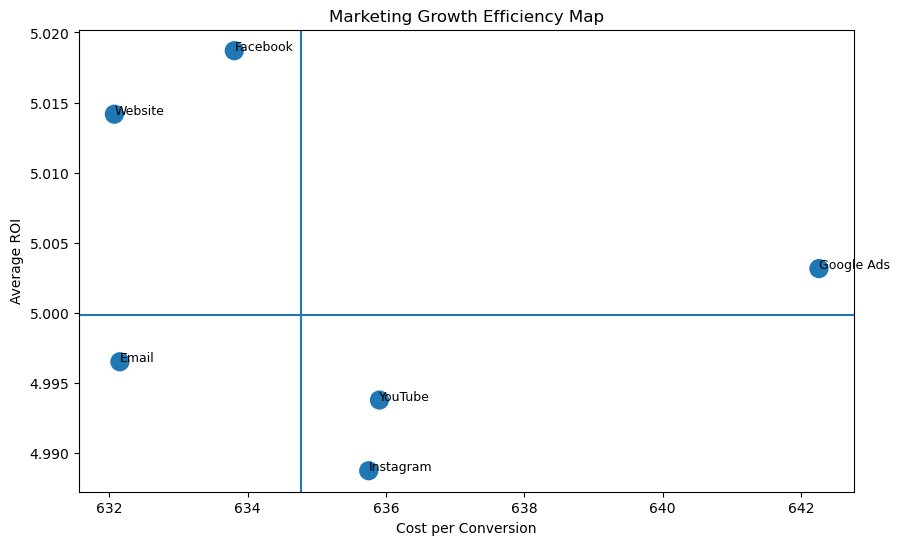

In [9]:
# ----------------------------------------------------
# EXECUTIVE GROWTH MAP
# ----------------------------------------------------

plt.figure(figsize=(10,6))

plt.scatter(
    channel_performance['avg_cost_per_conversion'],
    channel_performance['avg_roi'],
    s=channel_performance['avg_engagement'] * 30,
)

for _, row in channel_performance.iterrows():
    plt.text(
        row['avg_cost_per_conversion'],
        row['avg_roi'],
        row['Channel_Used'],
        fontsize=9
    )

plt.xlabel('Cost per Conversion')
plt.ylabel('Average ROI')
plt.title('Marketing Growth Efficiency Map')

plt.axhline(channel_performance['avg_roi'].median())
plt.axvline(channel_performance['avg_cost_per_conversion'].median())

plt.show()


In [11]:
import numpy as np
import pandas as pd

df = df.copy()

df['CTR'] = np.where(
    df['Impressions'] > 0,
    df['Clicks'] / df['Impressions'],
    0
)

df['CAC'] = np.where(
    df['Clicks'] > 0,
    df['Acquisition_Cost'] / df['Clicks'],
    np.nan
)

df['Estimated_Profit'] = df['ROI'] * df['Acquisition_Cost']


In [12]:
engagement_median = df['Engagement_Score'].median()

df['Engagement_Tier'] = np.where(
    df['Engagement_Score'] >= engagement_median,
    'High Engagement',
    'Low Engagement'
)


In [13]:
df[['CTR', 'CAC', 'ROI', 'Estimated_Profit']].describe()


,CTR,CAC,ROI,Estimated_Profit
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.140405,32.008490,5.002438,62586.943371
std,0.130881,26.926121,1.734488,31667.568417
min,0.010054,5.021084,2.000000,10064.070000
25%,0.058606,15.091967,3.500000,37809.710000
50%,0.099789,22.774008,5.010000,56193.525000
75%,0.169699,38.599088,6.510000,83274.240000
max,0.992024,199.960000,8.000000,159456.360000


In [14]:
channel_perf = (
    df.groupby('Channel_Used')
      .agg(
          campaigns=('Campaign_ID', 'nunique'),
          total_cost=('Acquisition_Cost', 'sum'),
          avg_roi=('ROI', 'mean'),
          avg_ctr=('CTR', 'mean'),
          avg_cac=('CAC', 'mean'),
          total_profit=('Estimated_Profit', 'sum')
      )
      .reset_index()
)

channel_perf.sort_values('total_profit', ascending=False)


,Channel_Used,campaigns,total_cost,avg_roi,avg_ctr,avg_cac,total_profit
0,Email,33599,420874104.0,4.996487,0.140543,31.881471,2.103770e+09
2,Google Ads,33438,418912314.0,5.003141,0.139190,32.309304,2.097811e+09
4,Website,33360,416593500.0,5.014167,0.140971,31.779545,2.087559e+09
5,YouTube,33392,416778582.0,4.993754,0.141196,31.872808,2.084326e+09
3,Instagram,33392,417124850.0,4.988706,0.140037,32.080786,2.079977e+09
1,Facebook,32819,410595258.0,5.018699,0.140499,32.129253,2.063945e+09


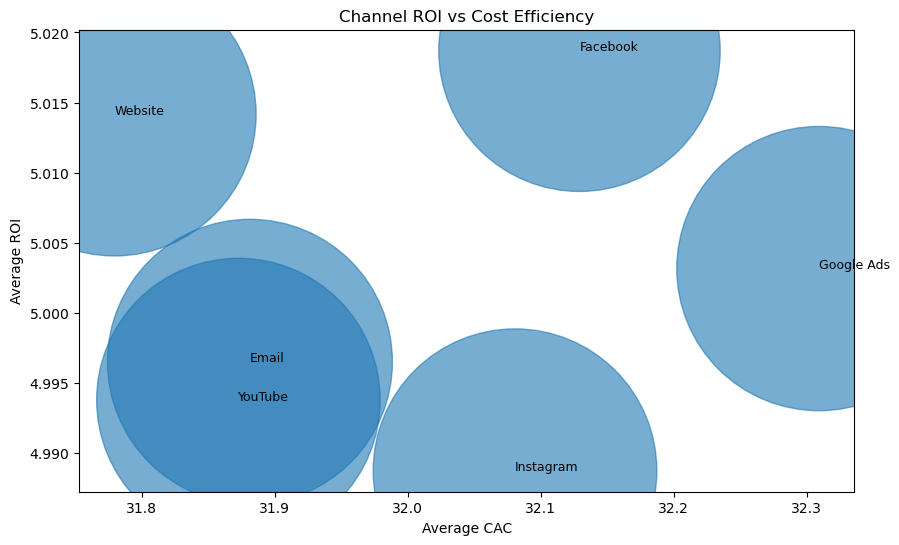

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    channel_perf['avg_cac'],
    channel_perf['avg_roi'],
    s=channel_perf['total_cost'] / 10000,
    alpha=0.6
)

for _, row in channel_perf.iterrows():
    plt.text(
        row['avg_cac'],
        row['avg_roi'],
        row['Channel_Used'],
        fontsize=9
    )

plt.xlabel('Average CAC')
plt.ylabel('Average ROI')
plt.title('Channel ROI vs Cost Efficiency')
plt.show()


In [16]:
channel_perf['Performance_Band'] = pd.qcut(
    channel_perf['total_profit'],
    q=3,
    labels=['Low Impact', 'Medium Impact', 'High Impact']
)

channel_perf[['Channel_Used', 'Performance_Band']].sort_values('Performance_Band')


,Channel_Used,Performance_Band
1,Facebook,Low Impact
3,Instagram,Low Impact
4,Website,Medium Impact
5,YouTube,Medium Impact
0,Email,High Impact
2,Google Ads,High Impact


In [17]:
campaign_perf = (
    df.groupby('Campaign_Type')
      .agg(
          campaigns=('Campaign_ID', 'nunique'),
          avg_roi=('ROI', 'mean'),
          avg_conversion=('Conversion_Rate', 'mean'),
          avg_cac=('CAC', 'mean'),
          total_profit=('Estimated_Profit', 'sum')
      )
      .reset_index()
)

campaign_perf.sort_values('total_profit', ascending=False)


,Campaign_Type,campaigns,avg_roi,avg_conversion,avg_cac,total_profit
2,Influencer,40169,5.011068,0.080315,32.102571,2.518951e+09
3,Search,40157,5.008357,0.080021,31.960865,2.514604e+09
0,Display,39987,5.006551,0.080089,31.923675,2.504836e+09
1,Email,39870,4.994295,0.079788,32.039639,2.491041e+09
4,Social Media,39817,4.991784,0.080135,32.015596,2.487957e+09


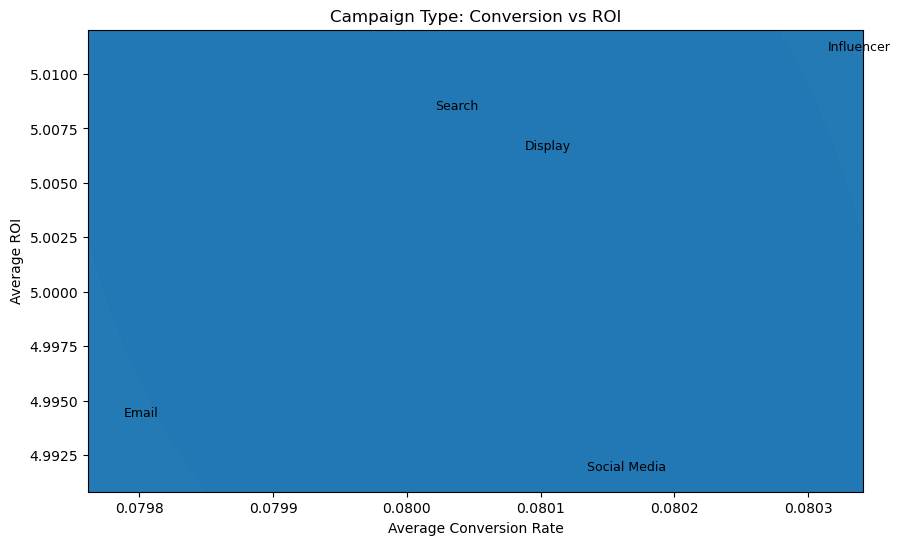

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(
    campaign_perf['avg_conversion'],
    campaign_perf['avg_roi'],
    s=campaign_perf['campaigns'] * 30,
    alpha=0.6
)

for _, row in campaign_perf.iterrows():
    plt.text(
        row['avg_conversion'],
        row['avg_roi'],
        row['Campaign_Type'],
        fontsize=9
    )

plt.xlabel('Average Conversion Rate')
plt.ylabel('Average ROI')
plt.title('Campaign Type: Conversion vs ROI')
plt.show()


In [19]:
audience_perf = (
    df.groupby('Target_Audience')
      .agg(
          campaigns=('Campaign_ID', 'nunique'),
          avg_roi=('ROI', 'mean'),
          avg_conversion=('Conversion_Rate', 'mean'),
          total_profit=('Estimated_Profit', 'sum')
      )
      .reset_index()
)

audience_perf.sort_values('total_profit', ascending=False)


,Target_Audience,campaigns,avg_roi,avg_conversion,total_profit
1,Men 18-24,40258,4.982853,0.080240,2.513946e+09
2,Men 25-34,40023,5.020627,0.080132,2.508615e+09
0,All Ages,40019,5.005174,0.079975,2.506269e+09
3,Women 25-34,40013,4.997351,0.079899,2.500956e+09
4,Women 35-44,39687,5.006330,0.080102,2.487603e+09


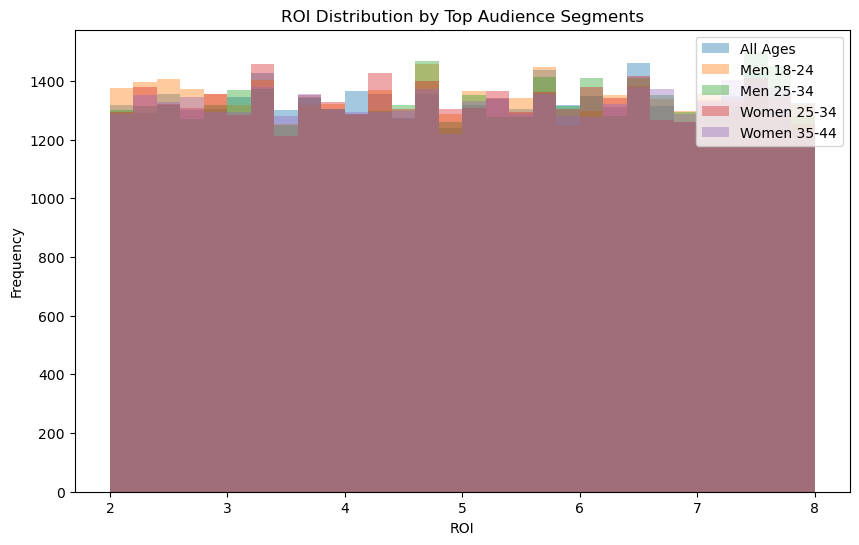

In [20]:
plt.figure(figsize=(10, 6))

for segment in audience_perf['Target_Audience'].head(5):
    subset = df[df['Target_Audience'] == segment]
    plt.hist(
        subset['ROI'],
        bins=30,
        alpha=0.4,
        label=segment
    )

plt.xlabel('ROI')
plt.ylabel('Frequency')
plt.title('ROI Distribution by Top Audience Segments')
plt.legend()
plt.show()


In [21]:
channel_perf = (
    df.groupby('Channel_Used')
      .agg(
          total_spend=('CAC', 'sum'),
          avg_roi=('ROI', 'mean'),
          total_profit=('Estimated_Profit', 'sum'),
          campaigns=('Campaign_ID', 'nunique')
      )
      .reset_index()
)

channel_perf.sort_values('total_spend', ascending=False)


,Channel_Used,total_spend,avg_roi,total_profit,campaigns
2,Google Ads,1.080358e+06,5.003141,2.097811e+09,33438
3,Instagram,1.071242e+06,4.988706,2.079977e+09,33392
0,Email,1.071186e+06,4.996487,2.103770e+09,33599
5,YouTube,1.064297e+06,4.993754,2.084326e+09,33392
4,Website,1.060166e+06,5.014167,2.087559e+09,33360
1,Facebook,1.054450e+06,5.018699,2.063945e+09,32819


In [22]:
roi_threshold = channel_perf['avg_roi'].median()
spend_threshold = channel_perf['total_spend'].median()

channel_perf['leakage_flag'] = (
    (channel_perf['total_spend'] > spend_threshold) &
    (channel_perf['avg_roi'] < roi_threshold)
)

channel_perf.sort_values('leakage_flag', ascending=False)


,Channel_Used,total_spend,avg_roi,total_profit,campaigns,leakage_flag
0,Email,1.071186e+06,4.996487,2.103770e+09,33599,True
3,Instagram,1.071242e+06,4.988706,2.079977e+09,33392,True
1,Facebook,1.054450e+06,5.018699,2.063945e+09,32819,False
2,Google Ads,1.080358e+06,5.003141,2.097811e+09,33438,False
4,Website,1.060166e+06,5.014167,2.087559e+09,33360,False
5,YouTube,1.064297e+06,4.993754,2.084326e+09,33392,False


In [23]:
roi_risk = (
    df.groupby('Channel_Used')['ROI']
      .std()
      .reset_index(name='roi_volatility')
)

channel_perf = channel_perf.merge(roi_risk, on='Channel_Used')

channel_perf.sort_values('roi_volatility', ascending=False)


,Channel_Used,total_spend,avg_roi,total_profit,campaigns,leakage_flag,roi_volatility
3,Instagram,1.071242e+06,4.988706,2.079977e+09,33392,True,1.739413
0,Email,1.071186e+06,4.996487,2.103770e+09,33599,True,1.738349
1,Facebook,1.054450e+06,5.018699,2.063945e+09,32819,False,1.738050
2,Google Ads,1.080358e+06,5.003141,2.097811e+09,33438,False,1.733629
5,YouTube,1.064297e+06,4.993754,2.084326e+09,33392,False,1.732278
4,Website,1.060166e+06,5.014167,2.087559e+09,33360,False,1.725129


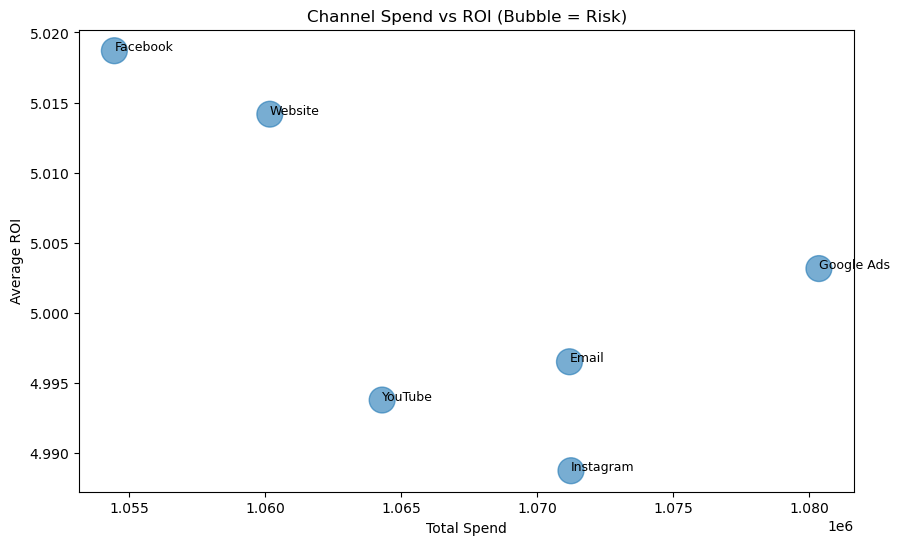

In [24]:
plt.figure(figsize=(10, 6))

plt.scatter(
    channel_perf['total_spend'],
    channel_perf['avg_roi'],
    s=channel_perf['roi_volatility'] * 200,
    alpha=0.6
)

for _, row in channel_perf.iterrows():
    plt.text(
        row['total_spend'],
        row['avg_roi'],
        row['Channel_Used'],
        fontsize=9
    )

plt.xlabel('Total Spend')
plt.ylabel('Average ROI')
plt.title('Channel Spend vs ROI (Bubble = Risk)')
plt.show()


In [26]:
# ---------------------------------------------
# DEFINE BASELINE & OPTIMIZED ROI (FOUNDATION)
# ---------------------------------------------

baseline_roi = df['ROI'].mean()

roi_cutoff = df['ROI'].quantile(0.25)

optimized_roi = (
    df[df['ROI'] > roi_cutoff]['ROI'].mean()
)

baseline_roi, optimized_roi


(np.float64(5.00243785), np.float64(5.7582513139353955))

In [27]:
recommendation_table = channel_perf.copy()

recommendation_table['recommended_action'] = recommendation_table.apply(
    lambda x:
        'Scale Aggressively'
        if x['avg_roi'] > optimized_roi
        and x['roi_volatility'] < channel_perf['roi_volatility'].median()

        else 'Optimize & Monitor'
        if x['avg_roi'] >= baseline_roi

        else 'Reduce / Pause',
    axis=1
)

recommendation_table[
    ['Channel_Used', 'total_spend', 'avg_roi', 'roi_volatility', 'recommended_action']
].sort_values('recommended_action')


,Channel_Used,total_spend,avg_roi,roi_volatility,recommended_action
1,Facebook,1.054450e+06,5.018699,1.738050,Optimize & Monitor
2,Google Ads,1.080358e+06,5.003141,1.733629,Optimize & Monitor
4,Website,1.060166e+06,5.014167,1.725129,Optimize & Monitor
0,Email,1.071186e+06,4.996487,1.738349,Reduce / Pause
3,Instagram,1.071242e+06,4.988706,1.739413,Reduce / Pause
5,YouTube,1.064297e+06,4.993754,1.732278,Reduce / Pause


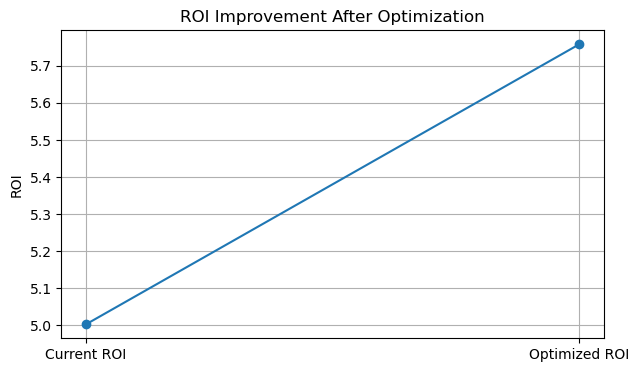

In [28]:
labels = ['Current ROI', 'Optimized ROI']
values = [baseline_roi, optimized_roi]

plt.figure(figsize=(7, 4))
plt.plot(labels, values, marker='o')
plt.title('ROI Improvement After Optimization')
plt.ylabel('ROI')
plt.grid(True)
plt.show()


In [ ]:
Find out where marketing money is working, where it is being wasted, why it is happening, and what should be done to improve growth and profit.

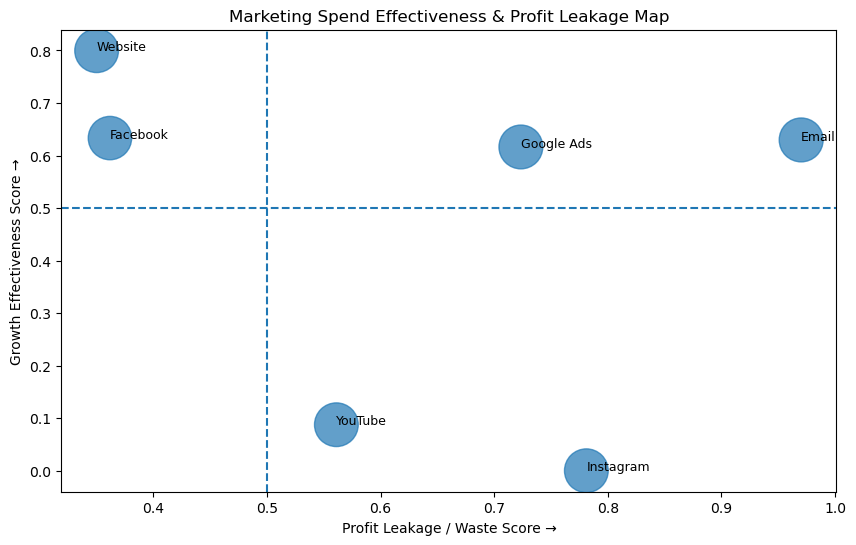

,Channel_Used,total_spend,avg_roi,avg_conversion,roi_volatility,net_value_score,recommended_action
4,Website,416593500.0,5.014167,0.080183,1.725129,0.449396,Scale & Invest More
1,Facebook,410595258.0,5.018699,0.079992,1.738050,0.271392,Scale & Invest More
2,Google Ads,418912314.0,5.003141,0.080183,1.733629,-0.107193,Reduce or Stop Spend
0,Email,420874104.0,4.996487,0.080282,1.738349,-0.340502,Reduce or Stop Spend
5,YouTube,416778582.0,4.993754,0.079889,1.732278,-0.473564,Reduce or Stop Spend
3,Instagram,417124850.0,4.988706,0.079886,1.739413,-0.781147,Reduce or Stop Spend


In [29]:
# ==========================================================
# FINAL MARKETING EFFECTIVENESS DECISION ENGINE
# ==========================================================
# This cell answers:
# 1. Where marketing money is working
# 2. Where it is wasted
# 3. Why it is happening
# 4. What action should be taken
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# STEP 1: Channel-level performance aggregation
# ----------------------------------------------------------
channel_summary = (
    df.groupby('Channel_Used')
      .agg(
          total_spend=('Acquisition_Cost', 'sum'),
          avg_roi=('ROI', 'mean'),
          roi_volatility=('ROI', 'std'),
          avg_conversion=('Conversion_Rate', 'mean'),
          total_clicks=('Clicks', 'sum'),
          total_impressions=('Impressions', 'sum')
      )
      .reset_index()
)

# ----------------------------------------------------------
# STEP 2: Normalize metrics (0–1 scale for fair scoring)
# ----------------------------------------------------------
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

channel_summary['roi_score'] = normalize(channel_summary['avg_roi'])
channel_summary['conversion_score'] = normalize(channel_summary['avg_conversion'])
channel_summary['risk_score'] = normalize(channel_summary['roi_volatility'])
channel_summary['waste_score'] = normalize(channel_summary['total_spend'])

# ----------------------------------------------------------
# STEP 3: Composite business scores
# ----------------------------------------------------------
# Growth effectiveness score (higher = better)
channel_summary['growth_score'] = (
    0.5 * channel_summary['roi_score'] +
    0.5 * channel_summary['conversion_score']
)

# Profit leakage score (higher = worse)
channel_summary['leakage_score'] = (
    0.6 * channel_summary['waste_score'] +
    0.4 * channel_summary['risk_score']
)

# Net marketing value score
channel_summary['net_value_score'] = (
    channel_summary['growth_score'] - channel_summary['leakage_score']
)

# ----------------------------------------------------------
# STEP 4: Decision logic (what should be done)
# ----------------------------------------------------------
channel_summary['recommended_action'] = channel_summary['net_value_score'].apply(
    lambda x:
        'Scale & Invest More' if x > 0.25 else
        'Optimize & Monitor' if x >= 0 else
        'Reduce or Stop Spend'
)

# ----------------------------------------------------------
# STEP 5: FINAL SINGLE GRAPH — PROJECT OUTPUT
# ----------------------------------------------------------
plt.figure(figsize=(10, 6))

plt.scatter(
    channel_summary['leakage_score'],
    channel_summary['growth_score'],
    s=channel_summary['total_spend'] / channel_summary['total_spend'].max() * 1000,
    alpha=0.7
)

for _, row in channel_summary.iterrows():
    plt.text(
        row['leakage_score'],
        row['growth_score'],
        row['Channel_Used'],
        fontsize=9
    )

plt.axhline(0.5, linestyle='--')
plt.axvline(0.5, linestyle='--')

plt.xlabel('Profit Leakage / Waste Score →')
plt.ylabel('Growth Effectiveness Score →')
plt.title('Marketing Spend Effectiveness & Profit Leakage Map')

plt.show()

# ----------------------------------------------------------
# STEP 6: FINAL DECISION TABLE (NUMERIC RESULTS)
# ----------------------------------------------------------
channel_summary[
    [
        'Channel_Used',
        'total_spend',
        'avg_roi',
        'avg_conversion',
        'roi_volatility',
        'net_value_score',
        'recommended_action'
    ]
].sort_values('net_value_score', ascending=False)
